In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

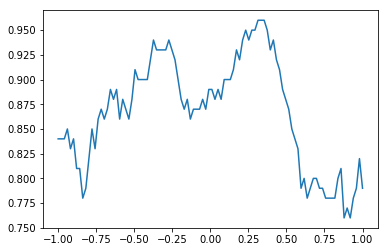

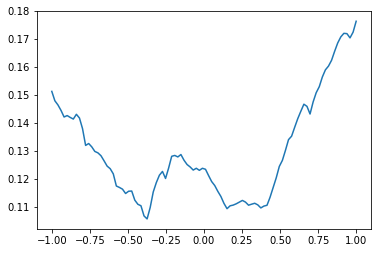

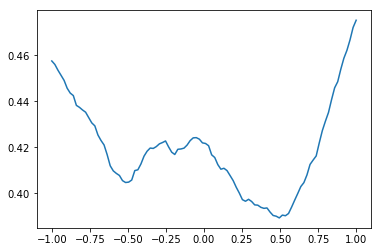

In [33]:
from econml.sklearn_extensions.honestforest import SubsampledHonestForest
n = 1000
d = 10
x_grid = np.linspace(-1, 1, 100)
X_test = np.hstack([x_grid.reshape(-1, 1), np.zeros((100, d-1))])
coverage = []
exp_dict = {'point': [], 'low': [], 'up': []}
for _ in range(100):
    X = np.random.normal(0, 1, size=(n, d))
    y = X[:, 0] + np.random.normal(size=(n,))
    est = SubsampledHonestForest(n_estimators=10000, global_averaging=True, verbose=0)
    est.fit(X, y)
    point = est.predict(X_test)
    low, up = est.predict_interval(X_test, 5, 95, normal=True)
    coverage.append((low <= x_grid) & (x_grid <= up))
    exp_dict['point'].append(point)
    exp_dict['low'].append(low)
    exp_dict['up'].append(up)

plt.plot(x_grid, np.mean(coverage, axis=0))
plt.show()

plt.plot(x_grid, np.sqrt(np.mean((np.array(exp_dict['point']) - x_grid)**2, axis=0)), label='RMSE')
plt.show()

plt.plot(x_grid, np.mean(np.array(exp_dict['up']) - np.array(exp_dict['low']), axis=0), label='length')
plt.show()

In [ ]:
from econml.sklearn_extensions.honestforest import SubsampledHonestForest
n = 100
d = 5
x_grid = np.linspace(-1, 1, 100)
X_test = np.hstack([x_grid.reshape(-1, 1), np.zeros((100, d-1))])
coverage = []
exp_dict = {'point': [], 'low': [], 'up': []}
for _ in range(100):
    X = np.random.normal(0, 1, size=(n, d))
    y = X[:, 0] + np.random.normal(size=(n,))
    est = SubsampledHonestForest(n_estimators=10000, global_averaging=True, verbose=0)
    est.fit(X, y)
    point = est.predict(X_test)
    low, up = est.predict_interval(X_test, 5, 95, normal=False)
    coverage.append((low <= x_grid) & (x_grid <= up))
    exp_dict['point'].append(point)
    exp_dict['low'].append(low)
    exp_dict['up'].append(up)

plt.plot(x_grid, np.mean(coverage, axis=0))
plt.show()

plt.plot(x_grid, np.sqrt(np.mean((np.array(exp_dict['point']) - x_grid)**2, axis=0)), label='RMSE')
plt.show()

plt.plot(x_grid, np.mean(np.array(exp_dict['up']) - np.array(exp_dict['low']), axis=0), label='length')
plt.show()

In [16]:
from econml.sklearn_extensions.honestforest import SubsampledHonestForest
import numpy as np
import matplotlib.pyplot as plt
n = 1000
d = 5
X = np.random.uniform(-1, 1, size=(n, d))
true_fn = lambda x: 1*(x[:, 0] > 0)
y = true_fn(X) + np.random.normal(size=(n,))
est = SubsampledHonestForest(n_estimators=1000, global_averaging=True, verbose=1)
est.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   24.2s finished


SubsampledHonestForest(criterion='mse', global_averaging=True, honest=True,
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=None, random_state=None,
            subsample_fr=0.5957798804722738, verbose=1, warm_start=False)

In [17]:
point = est.predict(np.hstack([np.linspace(-1, 1, 100).reshape(-1, 1), np.zeros((100, d-1))]))
low, up = est.predict_interval(np.hstack([np.linspace(-1, 1, 100).reshape(-1, 1), np.zeros((100, d-1))]),
                               1, 99, normal=True)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


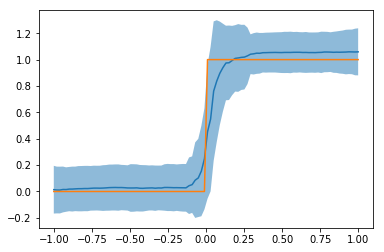

In [18]:
plt.fill_between(np.linspace(-1, 1, 100), low, up, alpha=.5)
plt.plot(np.linspace(-1, 1, 100), point)
plt.plot(np.linspace(-1, 1, 100), true_fn(np.linspace(-1, 1, 100)[:, np.newaxis]))
plt.show()